In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#導入資料集
profit_data=pd.read_excel(r'Predict to Profit.xlsx')

#顯示中文
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
profit_data.head()

,RD_Spend,Administration,Marketing_Spend,Salary,Profit
0,165349.20,136897.80,471784.10,217.409308,192261.83
1,162597.70,151377.59,443898.53,690.659173,191792.06
2,153441.51,101145.55,407934.54,370.156951,191050.39
3,144372.41,118671.85,383199.62,204.383473,182901.99
4,142107.34,91391.77,366168.42,1522.271490,166187.94


C:\Users\orozc\AppData\Local\Temp\ipykernel_24636\1917979299.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=profit_data.Profit,bins=10,fit=stats.norm,norm_hist=True,


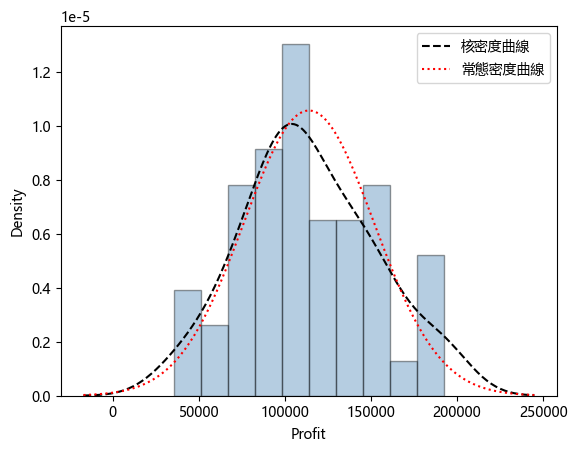

In [4]:
#繪製直方圖 (Profit)

sns.distplot(a=profit_data.Profit,bins=10,fit=stats.norm,norm_hist=True,
             hist_kws={'color':'steelblue','edgecolor':'black'},
             kde_kws={'color':'black','linestyle':'--','label':'核密度曲線'},
             fit_kws={'color':'red','linestyle':':','label':'常態密度曲線'})
plt.legend()
plt.show()

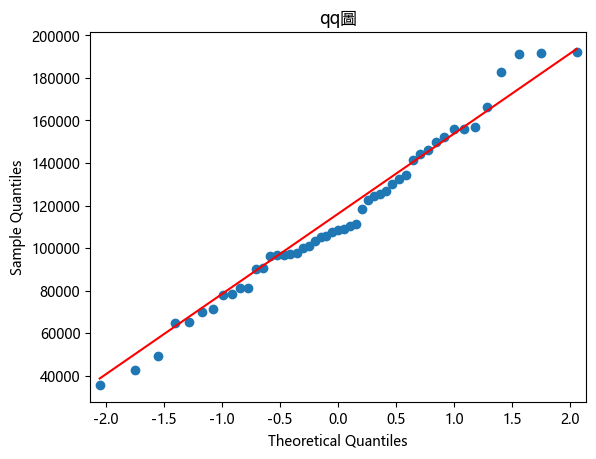

In [7]:
#QQ圖(應變數Profit)
import statsmodels.api as sm

qq_plot=sm.ProbPlot(profit_data.Profit)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

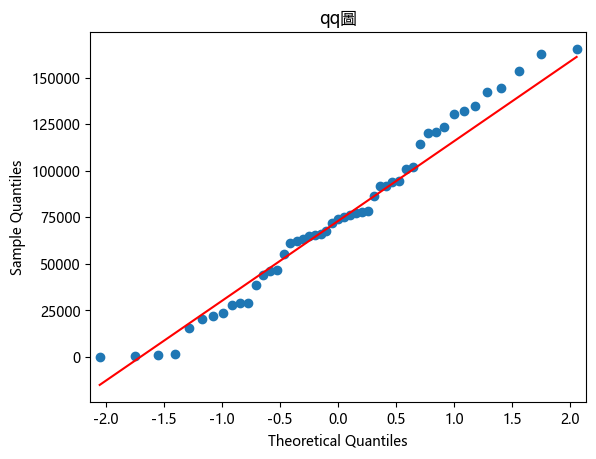

In [8]:
#QQ圖 (應變數RD_Spend)
import statsmodels.api as sm

qq_plot=sm.ProbPlot(profit_data.RD_Spend)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

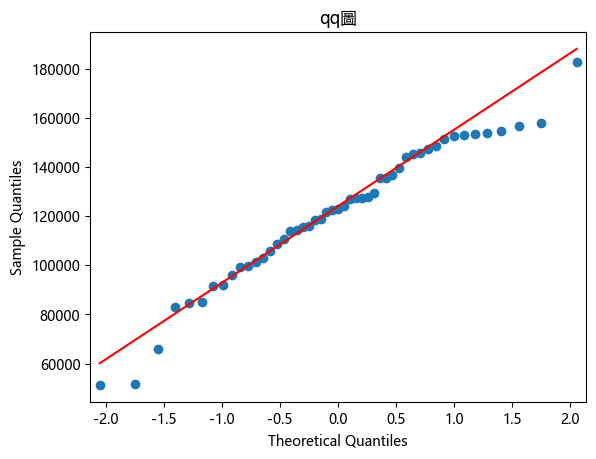

In [9]:
#QQ圖 (自變數Administration)
import statsmodels.api as sm

qq_plot=sm.ProbPlot(profit_data.Administration)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

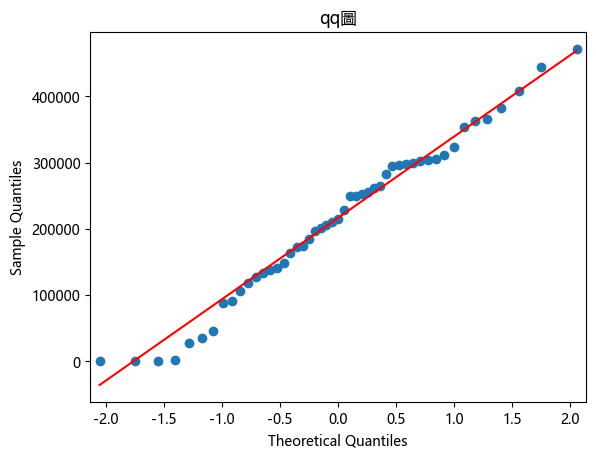

In [10]:
#QQ圖 (自變數Marketing_Spend)
import statsmodels.api as sm

qq_plot=sm.ProbPlot(profit_data.Marketing_Spend)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

C:\Users\orozc\AppData\Local\Temp\ipykernel_24636\2013933814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=profit_data.Salary,bins=10,fit=stats.norm,norm_hist=True,


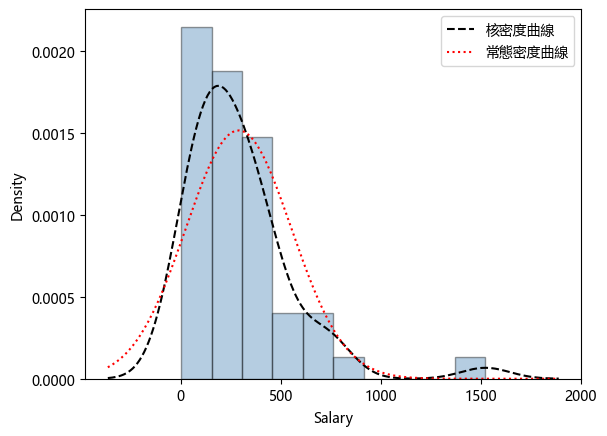

In [11]:
#繪製直方圖 (自變數Salary)

sns.distplot(a=profit_data.Salary,bins=10,fit=stats.norm,norm_hist=True,
             hist_kws={'color':'steelblue','edgecolor':'black'},
             kde_kws={'color':'black','linestyle':'--','label':'核密度曲線'},
             fit_kws={'color':'red','linestyle':':','label':'常態密度曲線'})
plt.legend()
plt.show()

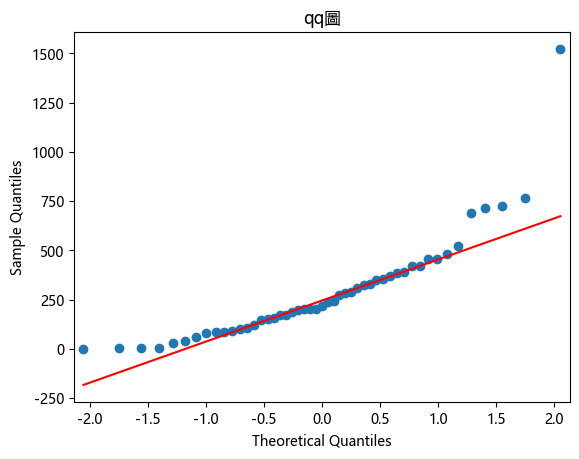

In [12]:
#QQ圖 (自變數Salary)
import statsmodels.api as sm

qq_plot=sm.ProbPlot(profit_data.Salary)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

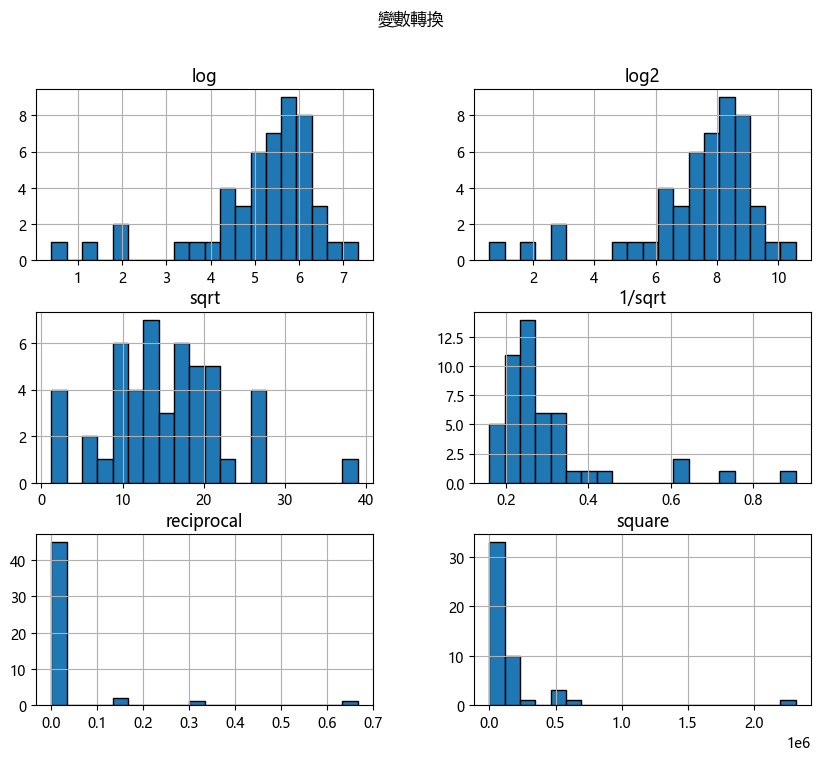

In [13]:
#自變數變換Salary
salary_tr=pd.DataFrame()
salary_tr['log']=np.log(profit_data['Salary'])
salary_tr['log2']=np.log2(profit_data['Salary'])
salary_tr['sqrt']=np.sqrt(profit_data['Salary'])
salary_tr['1/sqrt']=np.sqrt(profit_data['Salary'])**(-1/2)
salary_tr['reciprocal']=np.reciprocal(profit_data['Salary'])
salary_tr['square']=np.power(profit_data['Salary'],2)

salary_tr.hist(bins=20,layout=(3,2),edgecolor='k',figsize=(10,8))
plt.suptitle('變數轉換')
plt.show()

In [14]:
#共線性檢定
from statsmodels.stats.outliers_influence import variance_inflation_factor

#加入自變數RD_Spend,Marketing_Spend和常數1
X=sm.add_constant(profit_data.loc[:,['RD_Spend','Marketing_Spend','Salary']])

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF_Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif

,features,VIF_Factor
0,const,4.587816
1,RD_Spend,2.204249
2,Marketing_Spend,2.061042
3,Salary,1.325228


In [15]:
#計算應變數與自變數的coefficient_of_association
#選擇較高的coe自變數
coe=profit_data.drop('Profit',axis=1).corrwith(profit_data.Profit)
coe

RD_Spend           0.978437
Administration     0.205841
Marketing_Spend    0.739307
Salary             0.451889
dtype: float64

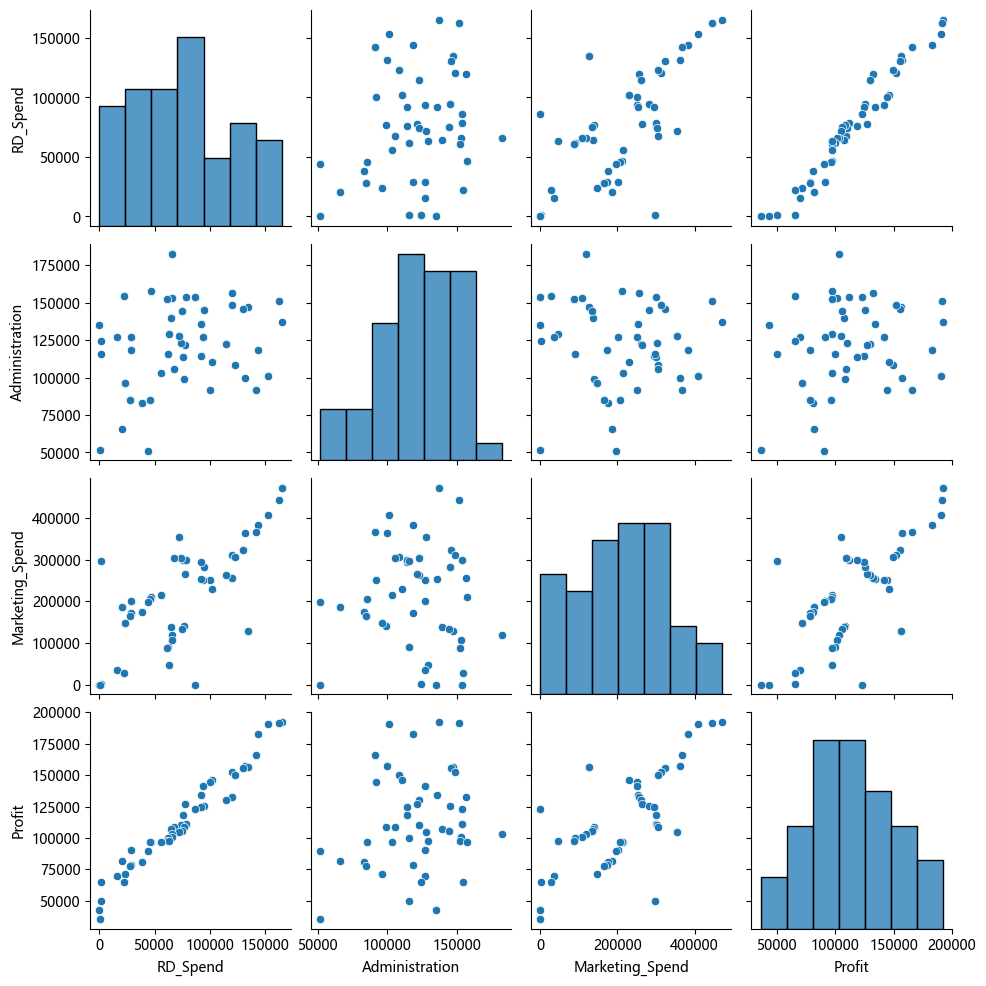

In [16]:
#透過視覺化方式

sns.pairplot(profit_data.loc[:,['RD_Spend','Administration','Marketing_Spend','Profit']])
plt.show()

In [17]:
#進行回歸模型
from sklearn.model_selection import train_test_split

train,test=train_test_split(profit_data,test_size=0.2,random_state=1)
model=sm.formula.ols('Profit ~ RD_Spend+Marketing_Spend',data=train).fit()
print(model.params)

Intercept          51478.301964
RD_Spend               0.752422
Marketing_Spend        0.026928
dtype: float64


In [18]:
#Profit=51478.3+0.75RD_Spend+0.02Marketing_Spend

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     431.3
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           7.07e-26
Time:                        00:32:37   Log-Likelihood:                -400.24
No. Observations:                  39   AIC:                             806.5
Df Residuals:                      36   BIC:                             811.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.148e+04   2701.454     19.056      0.000     4.6e+04     5.7e+04
RD_Spend            0.7524      0.036     21.104      0.000       0.680       0.825
Marketing_Spend     0.0269      0.013      2.005      0.052      -0.000       0.054
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.163
Skew:                          -0.076   Prob(JB):                        0.922
Kurtosis:                       2.722   Cond. No.                     6.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#預測值
pred=model.predict(test)
pred

27    115244.134010
34     92086.629889
39     85202.930933
48     51886.152213
2     177915.865271
3     170426.016935
42     73251.613496
29    103726.308950
45     52282.165691
30    100578.274996
dtype: float64

In [21]:
#實際值
test.Profit

27    105008.31
34     96712.80
39     81005.76
48     35673.41
2     191050.39
3     182901.99
42     71498.49
29    101004.64
45     64926.08
30     99937.59
Name: Profit, dtype: float64

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(test.Profit, pred)))
print("Mean absolute error: %.2f" % mean_absolute_error(test.Profit, pred))
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(test.Profit, pred))

Root mean squared error: 9516.14
Mean absolute error: 7864.18
Mean absolute percentage error: 0.10


# 增加模型複雜度

In [23]:
#相乘
profit_data['RD_Marketing_Spend']=profit_data['RD_Spend']*profit_data['Marketing_Spend']

#平方
profit_data['RD_Spend_2']=profit_data['RD_Spend']**(2)

#次方
profit_data['RD_Spend_3']=profit_data['RD_Spend']**(3)

profit_data.head()

,RD_Spend,Administration,Marketing_Spend,Salary,Profit,RD_Marketing_Spend,RD_Spend_2,RD_Spend_3
0,165349.20,136897.80,471784.10,217.409308,192261.83,7.800912e+10,2.734036e+10,4.520706e+15
1,162597.70,151377.59,443898.53,690.659173,191792.06,7.217688e+10,2.643801e+10,4.298760e+15
2,153441.51,101145.55,407934.54,370.156951,191050.39,6.259409e+10,2.354430e+10,3.612672e+15
3,144372.41,118671.85,383199.62,204.383473,182901.99,5.532345e+10,2.084339e+10,3.009211e+15
4,142107.34,91391.77,366168.42,1522.271490,166187.94,5.203522e+10,2.019450e+10,2.869786e+15


In [24]:
train,test=train_test_split(profit_data,test_size=0.2,random_state=1)
model=sm.formula.ols('Profit ~ RD_Spend+Marketing_Spend+RD_Marketing_Spend',data=train).fit()
pred=model.predict(test)
print(model.params)

Intercept             5.208987e+04
RD_Spend              7.435033e-01
Marketing_Spend       2.396942e-02
RD_Marketing_Spend    3.636702e-08
dtype: float64


In [25]:
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(test.Profit, pred)))
print("Mean absolute error: %.2f" % mean_absolute_error(test.Profit, pred))
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(test.Profit, pred))

Root mean squared error: 9462.77
Mean absolute error: 7810.17
Mean absolute percentage error: 0.10
